# Single Decision Tree
CS109 Final Project

In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

In [36]:
df = pd.read_csv('age_dataset1.csv', sep='\t')
del df['Unnamed: 0']

In [37]:
print(df.columns, df.isnull().sum(axis=0).tolist())

Index(['FIRST_NAME', 'GEN16', 'LAST_NAME', 'district', 'dob', 'electiondate',
       'female', 'id', 'party', 'regyear', 'typeofvote', 'zip', 'Prediction',
       'Race', 'age'],
      dtype='object') [2, 0, 2, 0, 431, 16297, 10, 0, 0, 0, 16297, 5, 2, 0, 431]


In [20]:
df['femaleis1'] = 0
df.loc[(df['female'] == "F"),'femaleis1'] = "1"

remove = ['FIRST_NAME', 'LAST_NAME', 'dob', 'electiondate',
       'female', 'id', 'regyear', 'typeofvote', 'zip', 'Prediction']
        
df.drop(remove, axis = 1, inplace = True)

In [21]:
df = df.dropna()
df.head()

,GEN16,district,party,Race,age,femaleis1
0,1.0,MRT,REP,5,67.0,0
1,1.0,CLA,REP,5,35.0,1
2,0.0,HIL,DEM,3,20.0,0
3,1.0,MON,NPA,5,43.0,0
4,1.0,BAK,REP,5,52.0,0


In [22]:
df.head()

,GEN16,district,party,Race,age,femaleis1
0,1.0,MRT,REP,5,67.0,0
1,1.0,CLA,REP,5,35.0,1
2,0.0,HIL,DEM,3,20.0,0
3,1.0,MON,NPA,5,43.0,0
4,1.0,BAK,REP,5,52.0,0


In [23]:
df.isnull().sum(axis=0).tolist()

[0, 0, 0, 0, 0, 0]

In [24]:
# Create dummies
df = pd.get_dummies(df, columns=['district','party', 'Race'], drop_first=True)

In [25]:
# Train/test split
msk = np.random.rand(len(df)) < 0.5
train = df[msk]
test = df[~msk]

#standardize
#train['age']=(train['age']-train['age'].mean())/train['age'].std()
#test['age']=(test['age']-train['age'].mean())/train['age'].std()

print ("Total Sample:", len (df))
print ("Test Sample:", len(test))
print ("Train Sample:", len(train))

Total Sample: 99569
Test Sample: 49749
Train Sample: 49820


In [26]:
# Create X and y split
## Not an even sample!!! Make train even...



didntshow = train[train['GEN16']==0]
showed = train[train['GEN16']==1]
didntshow = didntshow.sample(len(didntshow))
showed = showed.sample(len(didntshow))
frames = [didntshow, showed]
train_even = pd.concat(frames)
y_train = train_even['GEN16']
y_test = test['GEN16']
X_train = train_even.drop(['GEN16'], axis = 1)
X_test = test.drop(['GEN16'], axis = 1)

### Single Decision Tree

In [31]:
# Fit decision tree--- Kimia's edits 
depth = []
scores_test= []
scores_train= []
tree_start = 3
tree_end = 20
for i in range(tree_start,tree_end):
    #dt = DecisionTreeClassifier(max_depth=i)
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth = i)
    # Perform 5-fold cross-validation
    
    dt.fit(X_train, y_train)
    scores_train.append(dt.score(X_train, y_train))
    scores_test.append(dt.score(X_test, y_test))
    


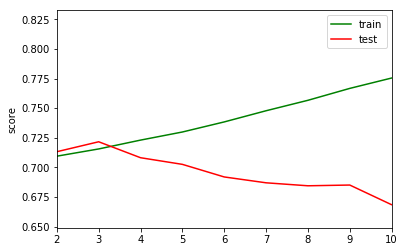

In [32]:
plt.plot(scores_train, c='g', label="train")
plt.plot(scores_test, c='r', label="test")
plt.ylabel('score')
plt.legend()
plt.xlim(2, 10)
plt.figure(figsize=(20,20))
plt.show()

In [33]:
# Nick, if you are reading this, know that standardizing age increased accuracy to about 80% at depth == 4

In [35]:
# Determine accuracy on train and test set
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3)
dt_fitted = dt.fit(X_train, y_train)
print("Test Accuracy:", dt_fitted.score(X_train, y_train))
print("Test Accuracy:", dt_fitted.score(X_test, y_test))

Test Accuracy: 0.697014557118
Test Accuracy: 0.682224768337


# Viz 

-0.27273657237242593

In [42]:
export_graphviz(dt, out_file='tree91.dot', feature_names = X_train.columns, class_names=['Voted', 'DidntVote'])

In [43]:
export_graphviz(dt, out_file='tree19.dot', feature_names = X_train.columns, class_names=['Voted', 'DidntVote'])

In [61]:
export_graphviz(dt,
                                    out_file      = 'testingWHYnickWHY1.txt', 
                                    feature_names = X_train.columns,
                                    class_names   = list(map(str, np.unique(list(y_train)))),
                                    filled        = True,
                                    rounded       = True
                                   )